In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import os
import shutil
from sklearn.model_selection import train_test_split

# Reset font settings to default English-compatible font
rcParams['font.sans-serif'] = []  # Clear any specific sans-serif settings
rcParams['font.family'] = 'Arial'  # Use Arial or another default English font
rcParams['axes.unicode_minus'] = False  # Ensure minus signs are displayed correctly

In [ ]:
from google.colab import drive # Import the correct module
drive.mount('/content/drive') # Use the mount function from google.colab.drive

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/foliage_PIC/mo3"

print("\n")
print(base_dir)



/content/drive/MyDrive/foliage_PIC/mo3


In [ ]:
classes = ['曬傷', '正常龜背芋', '爛根加老化', '病菌感染', '非龜背芋']

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

print(train_dir)
print(val_dir)
print(test_dir)

/content/drive/MyDrive/foliage_PIC/mo3/train
/content/drive/MyDrive/foliage_PIC/mo3/val
/content/drive/MyDrive/foliage_PIC/mo3/test


In [ ]:
# Initialize counts
counts = {'train': {}, 'val': {}, 'test': {}}

# Count files in each class directory
for split, split_dir in zip(['train', 'val', 'test'], [train_dir, val_dir, test_dir]):
    for class_name in classes:
        class_dir = os.path.join(split_dir, class_name)
        if os.path.exists(class_dir):
            counts[split][class_name] = len([
                f for f in os.listdir(class_dir)
                if os.path.isfile(os.path.join(class_dir, f))
            ])
        else:
            counts[split][class_name] = 0

# Display the counts
print("📊 各資料集中的分類圖像數量：")
for split in ['train', 'val', 'test']:
    print(f"\n📁 {split.capitalize()} 資料集：")
    for class_name, count in counts[split].items():
        print(f"  {class_name}: {count}")

📊 各資料集中的分類圖像數量：

📁 Train 資料集：
  曬傷: 41
  正常龜背芋: 383
  爛根加老化: 82
  病菌感染: 55
  非龜背芋: 304

📁 Val 資料集：
  曬傷: 14
  正常龜背芋: 128
  爛根加老化: 27
  病菌感染: 18
  非龜背芋: 102

📁 Test 資料集：
  曬傷: 14
  正常龜背芋: 128
  爛根加老化: 28
  病菌感染: 19
  非龜背芋: 102


In [ ]:
# import matplotlib.font_manager as fm

# # 印出系統上所有可用字體
fonts = sorted([f.name for f in fm.fontManager.ttflist])
for font in fonts:
    if any(c in font for c in ['Hei', 'Jheng', '宋', '明', '黑', '圓', '中']):
        print(font)

NameError: name 'fm' is not defined

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager
# import matplotlib as mpl

# # 完全設定中文字體並防止 fallback 到 Arial
font_path = "C:/Windows/Fonts/msyh.ttc"  # Microsoft YaHei 的字體檔案路徑
font_prop = matplotlib.font_manager.FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()

# # 防止負號亂碼 & 設定字體大小
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14


NameError: name 'matplotlib' is not defined

<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 26348 (\N{CJK UNIFIED IDEOGRAPH-66EC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 20663 (\N{CJK UNIFIED IDEOGRAPH-50B7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 40860 (\N{CJK UNIFIED IDEOGRAPH-9F9C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-206a0241aeb4>:21: UserWarning: Glyph 33419 (\N{CJK UNIFIED IDEOGRAPH-828B}) missing from font(s

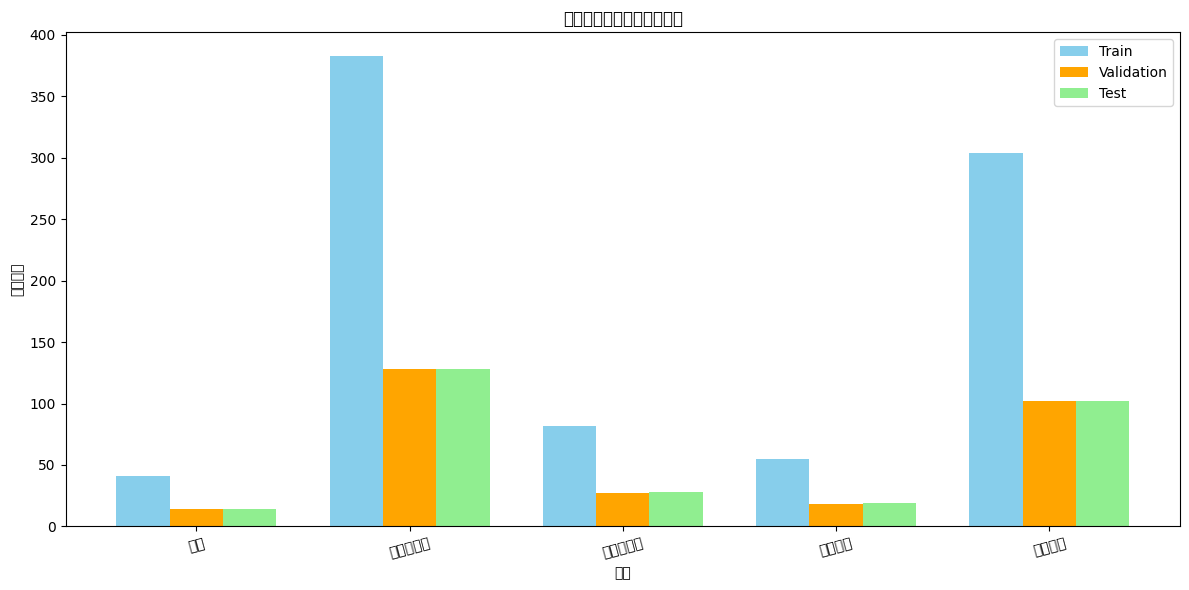

In [ ]:
# 🔧 資料準備給圖表
x = np.arange(len(classes))  # x 軸位置
train_counts = [counts['train'][cls] for cls in classes]
val_counts = [counts['val'][cls] for cls in classes]
test_counts = [counts['test'][cls] for cls in classes]

width = 0.25  # 每個 bar 的寬度

# 📈 繪製圖表
plt.figure(figsize=(12, 6))
plt.bar(x - width, train_counts, width, label='Train', color='skyblue')
plt.bar(x, val_counts, width, label='Validation', color='orange')
plt.bar(x + width, test_counts, width, label='Test', color='lightgreen')

# 標籤與設定
plt.title('各資料集分類圖片數量分佈')
plt.xlabel('分類')
plt.ylabel('圖片數量')
plt.xticks(x, classes, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 32317 (\N{CJK UNIFIED IDEOGRAPH-7E3D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-f0f1a03ee06b>:20: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu 

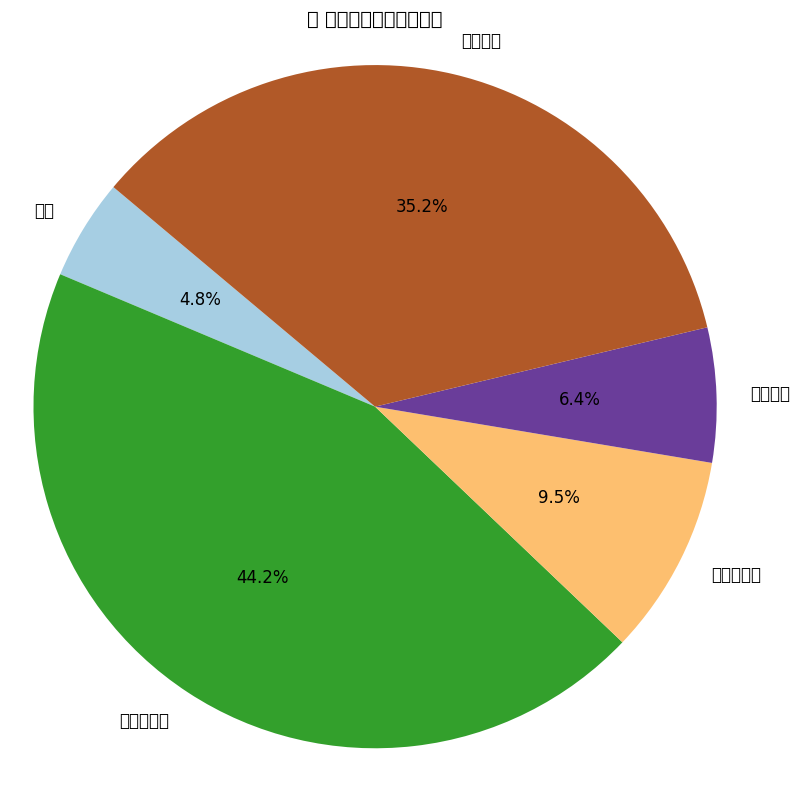

In [ ]:
import matplotlib.pyplot as plt

# 中文字體設定
# plt.rcParams['font.family'] = 'Microsoft JhengHei'
# plt.rcParams['axes.unicode_minus'] = False

# 計算每個分類的總和（train + val + test）
total_counts = {cls: counts['train'][cls] + counts['val'][cls] + counts['test'][cls] for cls in classes}

# 準備資料
labels = list(total_counts.keys())
sizes = list(total_counts.values())
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))  # 自動配色

# 畫圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('📊 各分類總圖片數量比例', fontsize=14)
plt.axis('equal')  # 讓圓形比例正確
plt.tight_layout()
plt.show()


# START Model Traning
Clooect current file

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

In [ ]:

# 👉 自動計算 class_weight
train_counts = {
    '曬傷': 41,
    '正常龜背芋': 383,
    '爛根加老化': 82,
    '病菌感染': 55,
    '非龜背芋': 304
}

# 計算 class_weights
total = sum(train_counts.values())
class_weight_dict = {
    i: round(total / (len(train_counts) * count), 2)
    for i, (cls, count) in enumerate(train_counts.items())
}
print("📊 類別權重：", class_weight_dict)


📊 類別權重： {0: 4.22, 1: 0.45, 2: 2.11, 3: 3.15, 4: 0.57}


In [ ]:

# 資料增強
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:

# 讀取資料
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), class_mode='categorical', classes=classes, batch_size=32, shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), class_mode='categorical', classes=classes, batch_size=32, shuffle=False
)

Found 865 images belonging to 5 classes.
Found 289 images belonging to 5 classes.


In [ ]:

# 建立模型
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# 🧠 Build model
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Phase 1: freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])

# 💾 Callbacks
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
callbacks = [checkpoint, early_stop, lr_schedule]

In [ ]:
# 儲存最佳模型
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [ ]:

# 🏋️ Phase 1: Train only top layers
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n🔒 Phase 1: Training only top layers (frozen base)...")
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=callbacks
)

# 🔓 Phase 2: Fine-tune full model
base_model.trainable = True  # Unfreeze entire MobileNetV2

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n🔓 Phase 2: Fine-tuning full model...")
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    class_weight=class_weight_dict,
    callbacks=callbacks
)


# # 訓練模型
# history = model.fit(
#     train_gen,
#     validation_data=val_gen,
#     epochs=25,
#     class_weight=class_weight_dict,
#     callbacks=[checkpoint]
# )



🔒 Phase 1: Training only top layers (frozen base)...
Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.2388 - loss: 2.0555 - val_accuracy: 0.2907 - val_loss: 1.5808 - learning_rate: 1.0000e-04
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.2608 - loss: 1.8238 - val_accuracy: 0.3806 - val_loss: 1.4709 - learning_rate: 1.0000e-04
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.3007 - loss: 1.5854 - val_accuracy: 0.4221 - val_loss: 1.3969 - learning_rate: 1.0000e-04
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.3541 - loss: 1.3659 - val_accuracy: 0.4464 - val_loss: 1.3666 - learning_rate: 1.0000e-04
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.4103 - loss: 1.4128 - val_accuracy: 0.4948 - val_loss: 1.3093 - learning_rate: 1.0000e-04
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4624 - loss: 1.3596 - val_accuracy: 0.5744 - val_loss: 1.2162 - learning_rate: 1.0000e-04
Epoch 7/10
28/28 ━━━━━

In [ ]:
import matplotlib.pyplot as plt

def plot_history(h1, h2=None):
    acc = h1.history['accuracy'] + (h2.history['accuracy'] if h2 else [])
    val_acc = h1.history['val_accuracy'] + (h2.history['val_accuracy'] if h2 else [])
    loss = h1.history['loss'] + (h2.history['loss'] if h2 else [])
    val_loss = h1.history['val_loss'] + (h2.history['val_loss'] if h2 else [])

    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Acc')
    plt.plot(epochs, val_acc, label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history1, history2)


NameError: name 'history1' is not defined

In [ ]:
test_gen = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    classes=classes,
    batch_size=32,
    shuffle=False
)

model.evaluate(test_gen)


Found 291 images belonging to 5 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 9s/step - accuracy: 0.7426 - loss: 0.8057


[0.7128111720085144, 0.769759476184845]

#  Step-by-Step: Confusion Matrix

In [ ]:
# 1. Prepare the test generator
test_gen = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    classes=classes,
    batch_size=32,
    shuffle=False
)


Found 291 images belonging to 5 classes.


In [ ]:
# 2. Get predictions and true labels
import numpy as np

# Get predictions
pred_probs = model.predict(test_gen)
pred_classes = np.argmax(pred_probs, axis=1)

# Get true labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


## 3. Generate the confusion matrix

In [ ]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())

Liberation Sans Narrow
Noto Serif CJK JP
Liberation Serif
Noto Sans CJK JP
Liberation Serif
Noto Sans CJK JP
Liberation Sans
Liberation Sans Narrow
Liberation Serif
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Noto Serif CJK JP
Liberation Sans
Liberation Serif
Liberation Sans Narrow
Humor Sans
Liberation Sans Narrow
Liberation Sans
Liberation Sans


In [ ]:
# Step 1: Install Traditional Chinese font (Noto CJK)
!apt-get -y install fonts-noto-cjk

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 3s (20.1 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126332 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
Using font: Noto Sans CJK JP


In [ ]:

# Path to the Traditional Chinese font
tc_font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
tc_font = fm.FontProperties(fname=tc_font_path)

# Optional: print the internal name of the font
print("Using font:", tc_font.get_name())

Using font: Noto Sans CJK JP


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

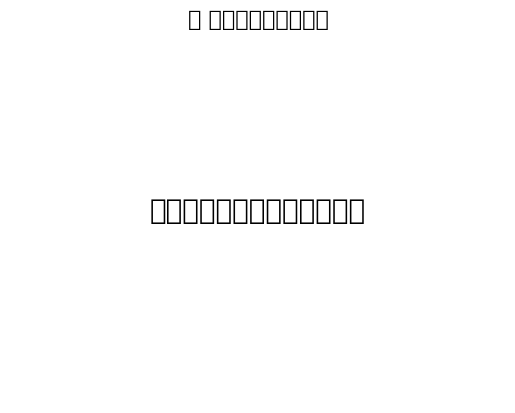

In [ ]:
plt.figure()
plt.text(0.5, 0.5, "曬傷、病菌感染、爛根加老化", fontsize=20, ha='center')
plt.title("✅ 中文字型已正常顯示", fontsize=16)
plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26348 (\N{CJK UNIFIED IDEOGRAPH-66EC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20663 (\N{CJK UNIFIED IDEOGRAPH-50B7}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 40860 (\N{CJK UNIFIED IDEOGRAPH-9F9C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from fon

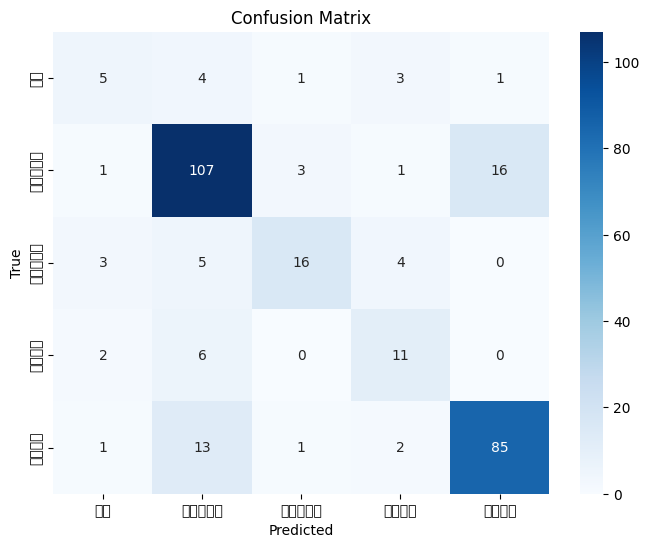

In [ ]:


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Classification report

This gives you precision, recall, and F1-score per class:

In [ ]:
print("📋 Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))


📋 Classification Report:

              precision    recall  f1-score   support

          曬傷       0.42      0.36      0.38        14
       正常龜背芋       0.79      0.84      0.81       128
       爛根加老化       0.76      0.57      0.65        28
        病菌感染       0.52      0.58      0.55        19
        非龜背芋       0.83      0.83      0.83       102

    accuracy                           0.77       291
   macro avg       0.67      0.64      0.65       291
weighted avg       0.77      0.77      0.77       291



1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26348 (\N{CJK UNIFIED IDEOGRAPH-66EC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20663 (\N{CJK UNIFIED IDEOGRAPH-50B7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


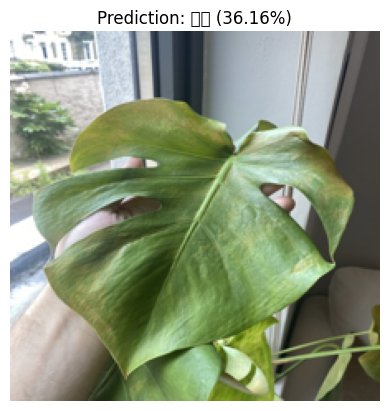

✅ Predicted Class: 曬傷
📊 Confidence: 36.16%


In [ ]:
import requests
from PIL import Image
import io
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# === Download image from URL ===
url = "https://www.houseplantjournal.com/wp-content/uploads/2023/07/Monstera-01-779x1024.jpg"
response = requests.get(url)
img = Image.open(io.BytesIO(response.content)).convert('RGB')
img = img.resize((224, 224))  # Match training size

# === Preprocess image ===
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# === Predict ===
pred_prob = model.predict(img_array)[0]
pred_class = np.argmax(pred_prob)
confidence = pred_prob[pred_class]
label = classes[pred_class]  # assumes classes = ['曬傷', '正常龜背芋', '爛根加老化', '病菌感染', '非龜背芋']

# === Show result ===
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {label} ({confidence:.2%})")
plt.show()

print(f"✅ Predicted Class: {label}")
print(f"📊 Confidence: {confidence:.2%}")
